<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220328_Gradient_Descent_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 경사하강법(Gradient Descent)
- 비용함수(Cost Function 혹은 Loss Function)를 최소화하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식

https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220321_KNN.ipynb#scrollTo=eGZuYBH44XVS

In [5]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

### 샘플에 활용할 데이터셋

In [39]:
def make_linear(w=0.5, b=0.8, size=50, noise=1):
  x = np.random.rand(size) # 0~1사이 50개 임의의 수
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # uniform(a, b) : a, b사이 랜덤숫자 리턴
  yy = y + noise # yy가 실제 값

  plt.figure(figsize=(10, 7))
  plt.plot(x, y, c='r', label='y={}*x+{}'.format(w, b))
  plt.scatter(x, yy, label='data') # data에는 noise가 당연히 있음
  plt.legend()
  plt.show()
  print('w:{}, b:{}'.format(w, b))
  return x, yy

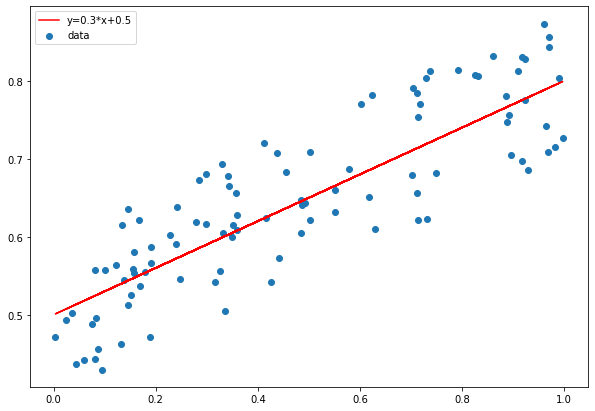

w:0.3, b:0.5


In [45]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.1)

### 초기값(Initializer)과 y_hat(예측, prediction) 함수 정의
- w, b 값에 대하여 random한 초기 값 설정

In [ ]:
w = np.random.uniform(low = -1.0, high = 1.0)
b = np.random.uniform(low = -1.0, high = 1.0)

y_hat = w * x + b

### 오차(Error) 정의
- Loss Function 혹은 Cost Function 정의

In [ ]:
error = (y_hat - y) ** 2 # y는 plot되는 직선

### 학습률(Learning Rate)
- 한번 학습할 때 얼마만큼 가중치를 업데이트 해야하는지 학습 양을 의미

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

### 경사하강법(Gradient Descent) 구현 - 단항식
- Loss Function을 w, b로 미분하는 방법 : https://dohwa.tistory.com/entry/Gradient-Descent-Algorithm-%EC%9E%91%EC%84%B1-%EC%A4%91

In [53]:
# 최대 반복 횟수
num_epoch = 5000
# 학습률
learning_rate = 1.5

 0회 반복, w=0.21335, b=0.32223, error=0.07113
500회 반복, w=0.31064, b=0.49914, error=0.00327
1000회 반복, w=0.31064, b=0.49914, error=0.00327
1500회 반복, w=0.31064, b=0.49914, error=0.00327
2000회 반복, w=0.31064, b=0.49914, error=0.00327
2500회 반복, w=0.31064, b=0.49914, error=0.00327
3000회 반복, w=0.31064, b=0.49914, error=0.00327
3500회 반복, w=0.31064, b=0.49914, error=0.00327
4000회 반복, w=0.31064, b=0.49914, error=0.00327
4500회 반복, w=0.31064, b=0.49914, error=0.00327
----------------------------------------------------------------
4999회 반복, w=0.3, b=0.5, error=0.00327


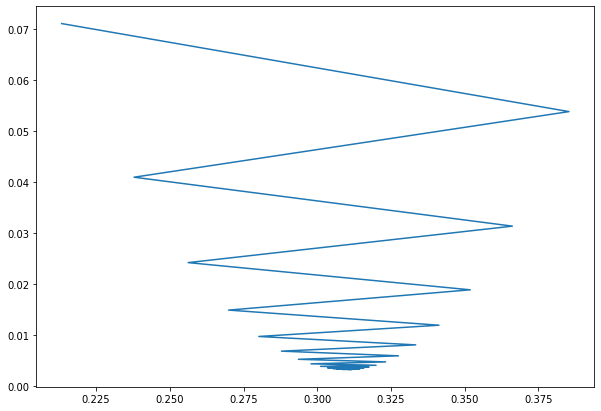

In [55]:
errors = []
w_list = []
b_list = []

# random한 값으로 w, b 초기화
w = np.random.uniform(low = -1.0, high = 1.0)
b = np.random.uniform(low = -1.0, high = 1.0)

for epoch in range(num_epoch):
  y_hat = w * x + b
  error = ((y_hat - y) ** 2).mean() # y는 plot되는 직선
  if error < 0.0005:
    break
  
  w = w - learning_rate * ((y_hat - y) * x).mean() # w- learning_rate * lossfunction을 w로 미분한 식

  b = b - learning_rate * (y_hat - y).mean() # b - learning_rate * lossfunction을 b로 미분한 식

  errors.append(error)
  w_list.append(w)
  b_list.append(b)

  if epoch % 500 == 0:
    print("{:2}회 반복, w={:.5f}, b={:.5f}, error={:.5f}".format(epoch, w, b, error))

plt.figure(figsize=(10, 7))
plt.plot(w_list, errors)
# plt.plot(b_list, errors)


print("----------------------------------------------------------------")
# error가 0.0005이하로 떨어졌을때
print("{:2}회 반복, w={:.1f}, b={:.1f}, error={:.5f}".format(epoch, w, b, error))


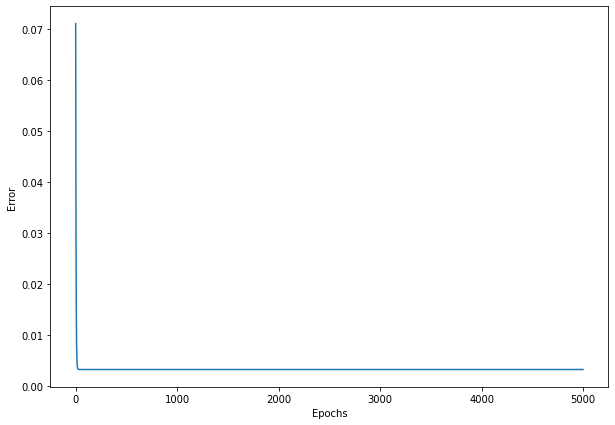

In [58]:
plt.figure(figsize=(10, 7))
plt.plot(errors) # errors : error가 반복횟수만큼 들어있는 리스트
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


### 경사하강법(Gradient Descent) 구현 - 다항식
- 늘어나는 Feature Data 만큼 w의 개수도 늘어난다.(b 계수는 1개로 동일)

Text(0.5, 0, 'y')

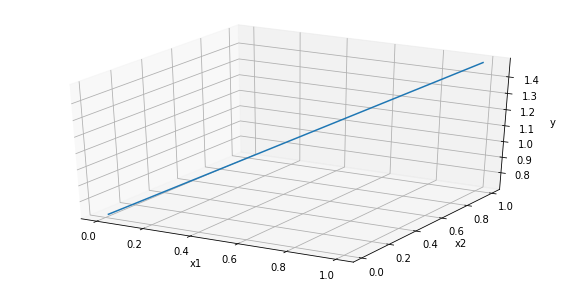

In [ ]:
# 데이터 생성
x1 = np.random.rand(100)
x2 = np.random.rand(100)

# 다항식 정의
y = 0.3 * x1 + 0.5 * x2 + 0.7

# 다항식 시각화
xx = np.linspace(x1.min(), x1.max())
yy = np.linspace(x2.min(), x2.max())
zz = 0.3 * xx + 0.5 * yy + 0.7 # meshgrid(xx,yy)를 빼먹어버림...

plt.figure(figsize=(10, 5))
ax_3d = plt.subplot(projection='3d')
ax_3d.plot(xx, yy, zz)
ax_3d.set_xlabel("x1")
ax_3d.set_ylabel("x2")
ax_3d.set_zlabel("y")

Text(0.5, 0, 'y')

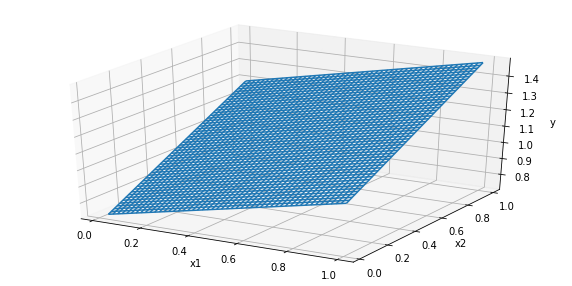

In [59]:
# 데이터 생성
x1 = np.random.rand(100)
x2 = np.random.rand(100)

# 다항식 정의
y = 0.3 * x1 + 0.5 * x2 + 0.7

# 다항식 시각화
xx = np.linspace(x1.min(), x1.max())
yy = np.linspace(x2.min(), x2.max())
XX, YY = np.meshgrid(xx, yy)
ZZ = 0.3 * XX + 0.5 * YY + 0.7

plt.figure(figsize=(10, 5))
ax_3d = plt.subplot(projection='3d')
ax_3d.plot_wireframe(XX, YY, ZZ)
ax_3d.set_xlabel("x1")
ax_3d.set_ylabel("x2")
ax_3d.set_zlabel("y")

In [60]:
# 데이터 생성
x1 = np.random.rand(100)
x2 = np.random.rand(100)

# 다항식 정의(실제 y값)
y = 0.3 * x1 + 0.5 * x2 + 0.7 # 원래는 w1, w2, b 값을 몰라서 찾는 상황임 : featrue들(x1, x2,...)만 가지고 상관관계를 찾는것


# 반복횟수
num_epoch = 5000
# 학습률
learning_rate = 0.001

# 임의의 w, b 초기값 생성
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

# 그래프 그릴대 써먹을 리스트
errors = []
w1_grad = []
w2_grad = []
b_grad = []

for epoch in range(num_epoch):
  # 예측값
  y_hat = w1 * x1 + w2 * x2 + b

  error = ((y_hat - y)**2).mean() # 최소화 시켜야하는 값 : Loss Function
  if error < 0.00001:
    break
  
  # 미분값 적용(Gradient)
  w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
  w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
  b = b - learning_rate * ((y_hat - y)).mean()

  errors.append(error)
  w1_grad.append(w1)
  w2_grad.append(w2)
  b_grad.append(b)
  
  if epoch % 50 == 0:

    print("{:2}회 반복, w1={:.5f}, w2={:.5f}, b={:.5f}, error={:.5f}".format(epoch, w1, w2, b, error))

print("----------------------------------------------------------------")
# error가 0.00001이하로 떨어졌을때
print("{:2}회 반복, w1={:.5f}, w2={:.5f}, b={:.5f}, error={:.5f}".format(epoch, w1, w2, b, error))




 0회 반복, w1=0.04394, w2=-0.89453, b=-0.15247, error=3.26502
50회 반복, w1=0.08823, w2=-0.84203, b=-0.06795, error=2.78914
100회 반복, w1=0.12897, w2=-0.79336, b=0.00999, error=2.38378
150회 반복, w1=0.16643, w2=-0.74824, b=0.08188, error=2.03848
200회 반복, w1=0.20087, w2=-0.70638, b=0.14817, error=1.74433
250회 반복, w1=0.23251, w2=-0.66755, b=0.20930, error=1.49375
300회 반복, w1=0.26157, w2=-0.63150, b=0.26567, error=1.28027
350회 반복, w1=0.28827, w2=-0.59802, b=0.31763, error=1.09839
400회 반복, w1=0.31276, w2=-0.56692, b=0.36554, error=0.94342
450회 반복, w1=0.33524, w2=-0.53801, b=0.40971, error=0.81138
500회 반복, w1=0.35585, w2=-0.51112, b=0.45042, error=0.69885
550회 반복, w1=0.37473, w2=-0.48611, b=0.48794, error=0.60296
600회 반복, w1=0.39203, w2=-0.46282, b=0.52252, error=0.52122
650회 반복, w1=0.40787, w2=-0.44112, b=0.55438, error=0.45154
700회 반복, w1=0.42235, w2=-0.42089, b=0.58374, error=0.39214
750회 반복, w1=0.43559, w2=-0.40202, b=0.61078, error=0.34148
800회 반복, w1=0.44768, w2=-0.38441, b=0.63570, error=0.298

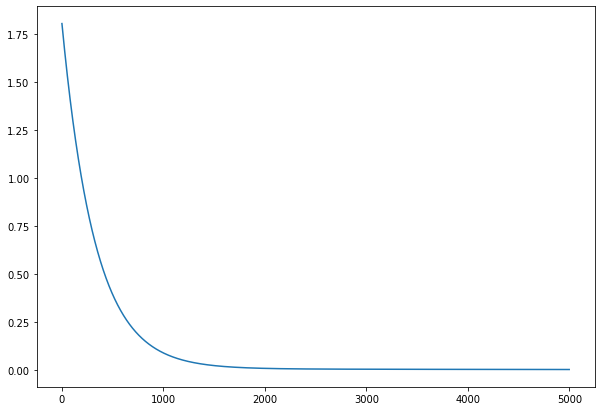

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)

### 적절한 학습률(learning_rate) 구하기

Learning_rate=0.0001, w1=-0.55142, w2=0.65755, b=0.59584, error=0.25006


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

Learning_rate=0.001, w1=-0.20080, w2=0.68424, b=0.86043, error=0.02127
Learning_rate=0.01, w1=0.27518, w2=0.49282, b=0.71638, error=0.00005


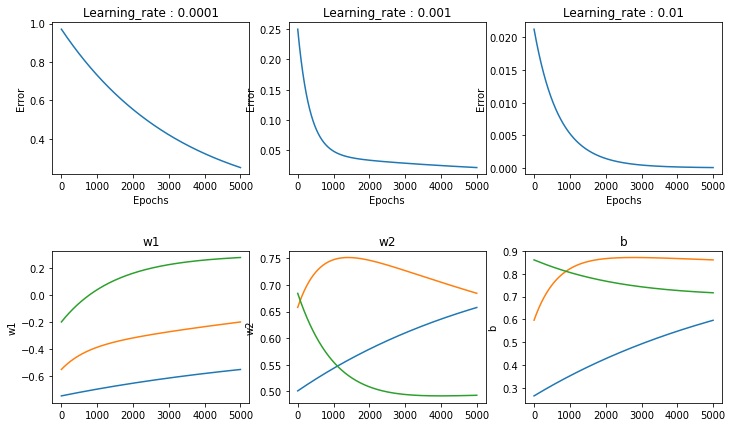

In [ ]:
# 데이터 생성
x1 = np.random.rand(100)
x2 = np.random.rand(100)

# 다항식 정의(실제 y값)
y = 0.3 * x1 + 0.5 * x2 + 0.7 # 원래는 w1, w2, b 값을 몰라서 찾는 상황임 : featrue들(x1, x2,...)만 가지고 상관관계를 찾는것


# 반복횟수
num_epoch = 5000
# 학습률
learning_rates = [0.0001, 0.001, 0.01]

# 임의의 w, b 초기값 생성
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

# state-machine 인터페이스(plt.figure(~))에서 사용가능한 서브플롯 간격조정 방법
plt.figure(figsize=(12, 7)) # constrained_layout = True
plt.subplots_adjust(hspace=0.5)
for idx,learning_rate in enumerate(learning_rates):

  # 그래프 그릴때 써먹을 리스트
  errors = []
  w1_grad = []
  w2_grad = []
  b_grad = []

  for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + b

    error = ((y_hat - y)**2).mean() # 최소화 시켜야하는 값 : Loss Function
    if error < 0.00001:
      break
    

    # 미분값 적용(Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    b = b - learning_rate * ((y_hat - y)).mean()

    errors.append(error)
    w1_grad.append(w1)
    w2_grad.append(w2)
    b_grad.append(b)
  

  plt.subplot(2,3,idx+1)
  plt.plot(errors)
  plt.title("Learning_rate : {}".format(learning_rate))
  plt.xlabel("Epochs")
  plt.ylabel("Error")

  plt.subplot(2, 3, 4)
  plt.plot(w1_grad)
  plt.title("w1")
  plt.ylabel("w1")
  plt.subplot(2, 3, 5)
  plt.plot(w2_grad)
  plt.title("w2")
  plt.ylabel("w2")
  plt.subplot(2, 3, 6)
  plt.plot(b_grad)
  plt.title("b")
  plt.ylabel("b")
  print("Learning_rate={}, w1={:.5f}, w2={:.5f}, b={:.5f}, error={:.5f}".format(learning_rate, w1, w2, b, error))






학습률(Learning_rate)은 과소/과대 할 경우 → 비효율 적이거나/error가 튀어오를 수 있음